In [23]:
import numpy as np
import matplotlib.pyplot as plt
import Qchains
import plotly.graph_objects as go
from scipy.optimize import curve_fit

# Ring in a ring

Motivation behind this:<br>
Know that the sub radiant states have different phases varying down the chain. So by putting another ring around we might be able to construct different phases between the different rings too. This could potentially give us even more subradiant states. 

In [24]:
size = 100
ringxy = Qchains.RingGenerater(size)
ringyz =  Qchains.RingGenerater(size)
ringxz = Qchains.RingGenerater(size)

In [25]:
# Copy points to avoid modifying original
new_ringyz = ringyz.copy()
new_ringxz = ringxz.copy()

# Swap y → z, set y = 0
new_ringyz[:, 2] = new_ringyz[:, 1]  # move y to z
new_ringyz[:, 1] = 0             # set y to zero

new_ringxz[:, 2] = new_ringxz[:, 0]
new_ringxz[:, 0] = 0  

In [26]:
Qchains.StructurePlotter(new_ringyz)
Qchains.StructurePlotter(new_ringxz)

In [27]:
gyroscope_xyz = np.vstack((ringxy, new_ringyz, new_ringxz))
print(np.shape(gyroscope_xyz))

#Remove duplicates (unique rows)
rounded = np.round(gyroscope_xyz, decimals=5)
_, unique_indices = np.unique(rounded, axis=0, return_index=True)
gyroscope_xyz_filtered = gyroscope_xyz[unique_indices]
print(np.shape(gyroscope_xyz_filtered))

(300, 3)
(294, 3)


In [28]:
Qchains.StructurePlotter(gyroscope_xyz_filtered)

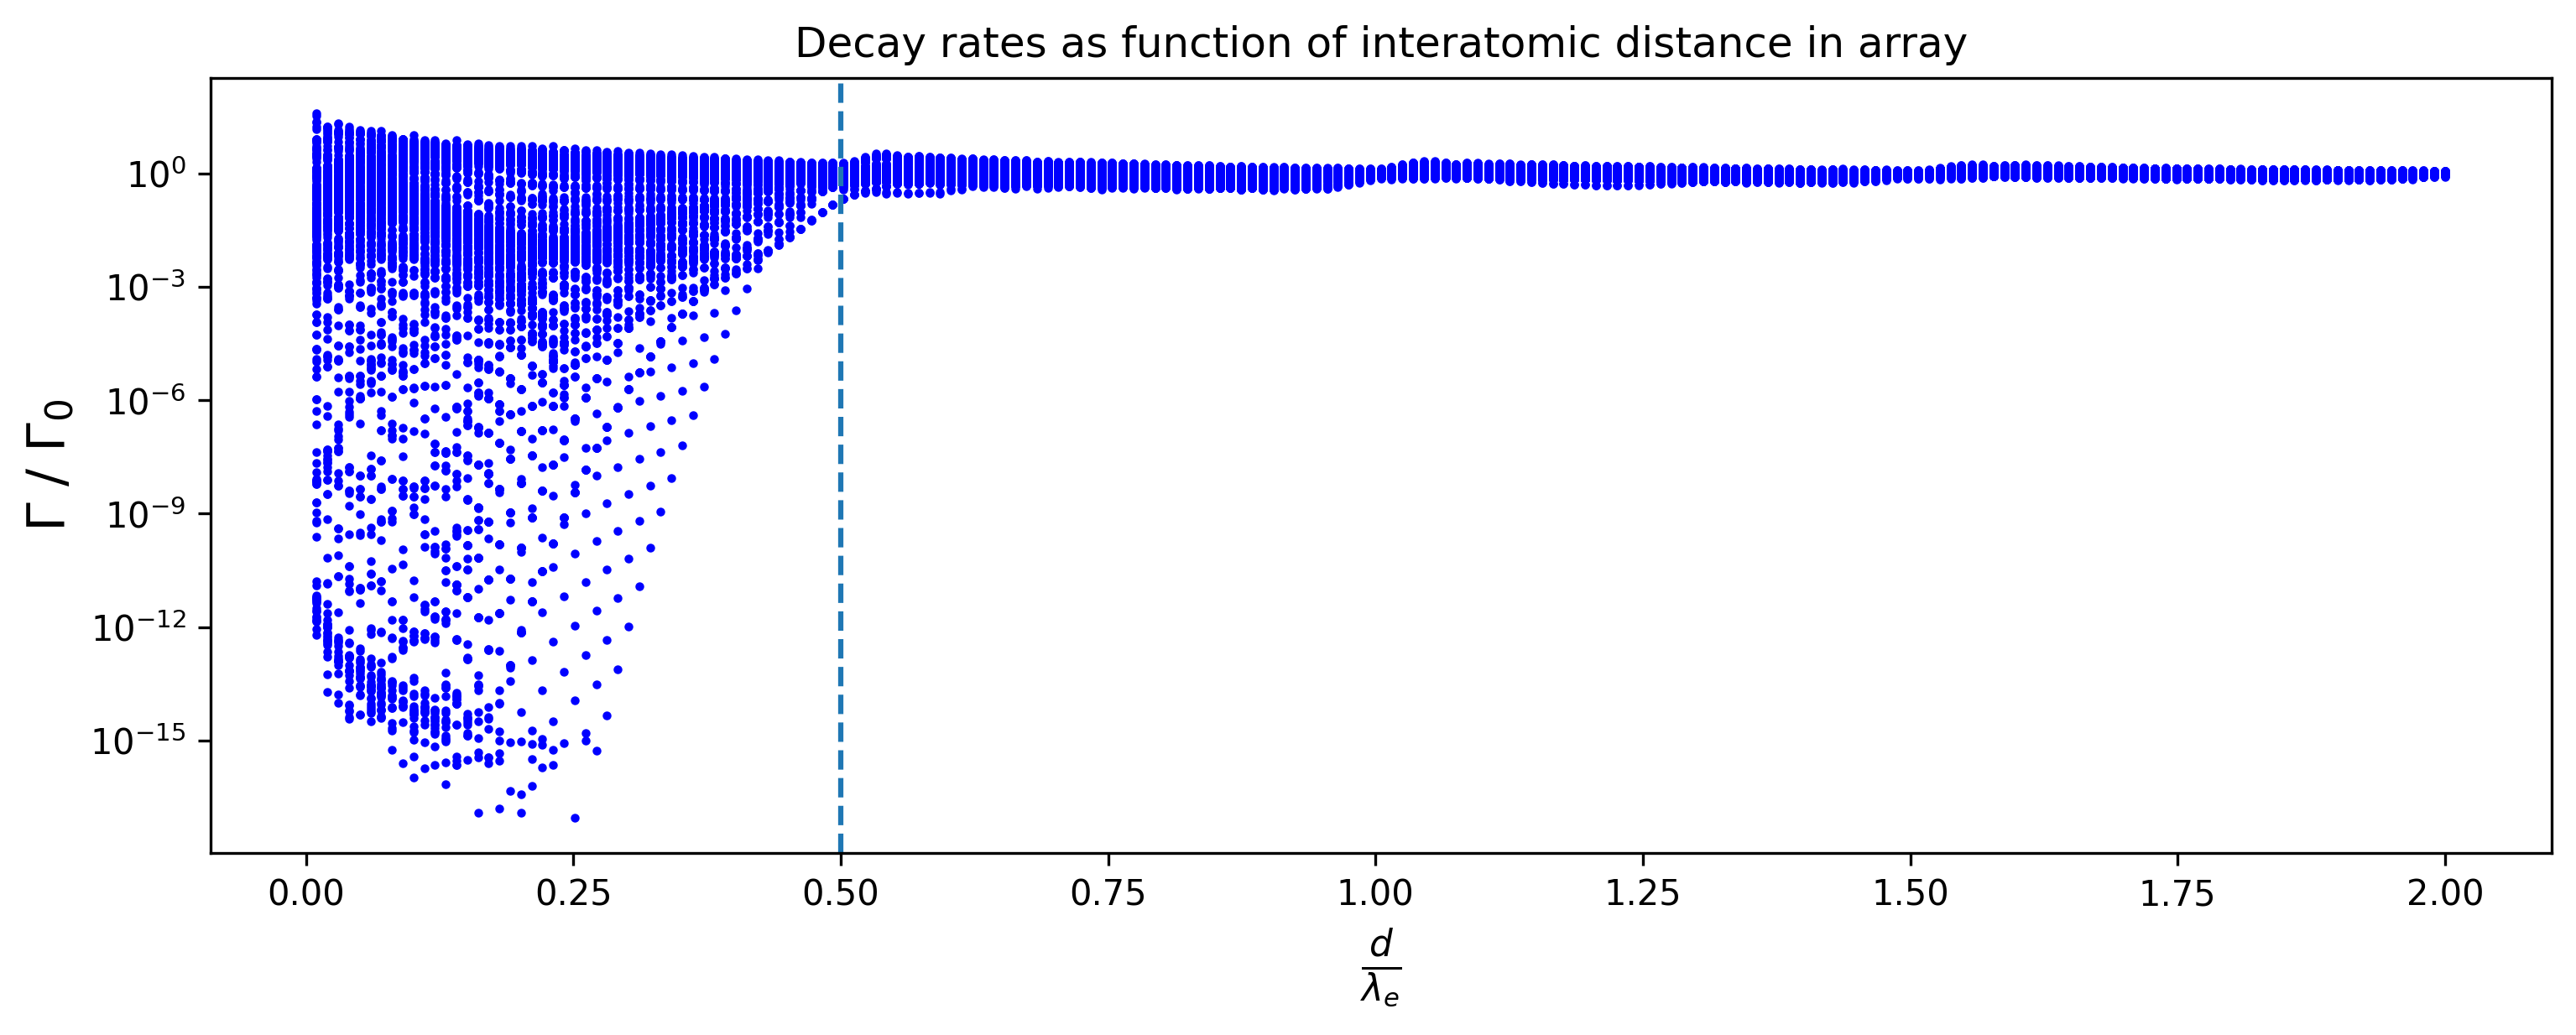

In [29]:
dipole_hatvec = np.array([1, 0, 0])
decay_rate_list = []
most_subradiant_list = []
distances = np.linspace(0, 2, 200) #ik gang med pi, da det gøre i funktionen Qchains.FindEigenstates

for d in distances[1:]:
    eigvals_gyroscope , eigvec_gyroscope = Qchains.FindEigenstates(gyroscope_xyz_filtered, dipole_hatvec, d)
    decay_rate = 2 * eigvals_gyroscope.real
    decay_rate_list.append(decay_rate)

    subradiant = -np.max(2 * eigvals_gyroscope.real)
    most_subradiant_list.append(subradiant)
    

decay_rate_list_reversed = [-p for p in decay_rate_list]
plt.figure(figsize=(12,4), dpi=300)
plt.plot(distances[1:], decay_rate_list_reversed, '.', c = 'blue', markersize=3);
plt.xlabel(r'$\frac{d}{\lambda_e}$', size = 15)
plt.ylabel(r'$\Gamma$ / $\Gamma_0$', size = 15)
plt.axvline(x = 1/2, ymin = 0, ymax=3, linestyle = '--')
plt.title('Decay rates as function of interatomic distance in array')
plt.yscale('log')


In [30]:
gyroscope_yz = gyroscope_yz = np.vstack((ringxy, new_ringyz))
print(np.shape(gyroscope_yz))

#Remove duplicates (unique rows)
rounded = np.round(gyroscope_yz, decimals=5)
_, unique_indices = np.unique(rounded, axis=0, return_index=True)
gyroscope_yz_filtered = gyroscope_yz[unique_indices]
print(np.shape(gyroscope_yz_filtered))
Qchains.StructurePlotter(gyroscope_yz_filtered)

(200, 3)
(198, 3)


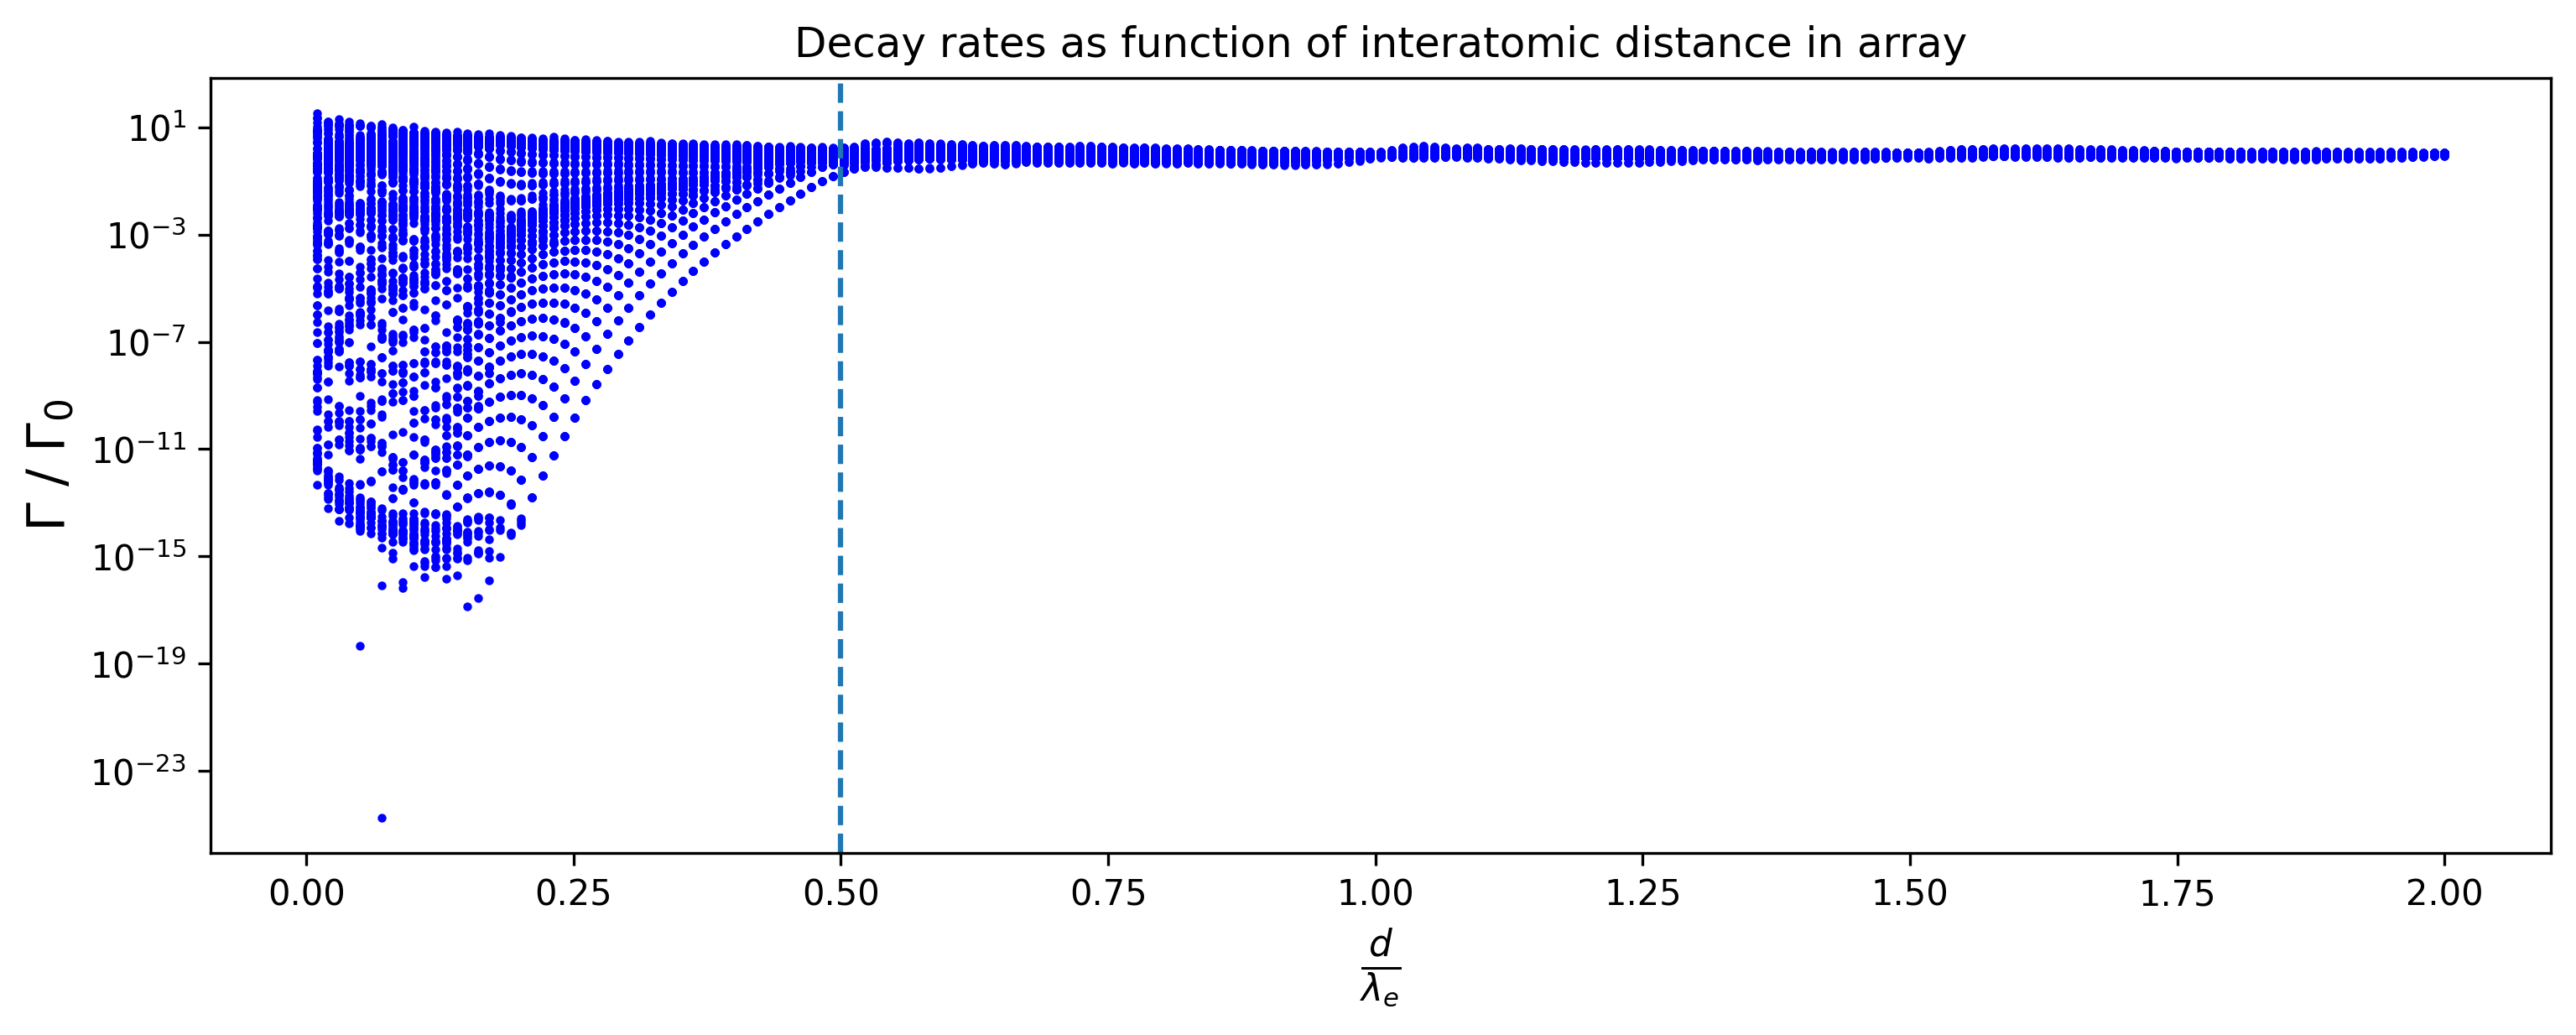

In [31]:
dipole_hatvec = np.array([1, 0, 0])
decay_rate_list = []
most_subradiant_list = []
distances = np.linspace(0, 2, 200) #ik gang med pi, da det gøre i funktionen Qchains.FindEigenstates

for d in distances[1:]:
    eigvals_gyroscope , eigvec_gyroscope = Qchains.FindEigenstates(gyroscope_yz_filtered, dipole_hatvec, d)
    decay_rate = 2 * eigvals_gyroscope.real
    decay_rate_list.append(decay_rate)

    subradiant = -np.max(2 * eigvals_gyroscope.real)
    most_subradiant_list.append(subradiant)


decay_rate_list_reversed = [-p for p in decay_rate_list]
plt.figure(figsize=(12,4), dpi=300)
plt.plot(distances[1:], decay_rate_list_reversed, '.', c = 'blue', markersize=3);
plt.xlabel(r'$\frac{d}{\lambda_e}$', size = 15)
plt.ylabel(r'$\Gamma$ / $\Gamma_0$', size = 15)
plt.axvline(x = 1/2, ymin = 0, ymax=3, linestyle = '--')
plt.title('Decay rates as function of interatomic distance in array')
plt.yscale('log')
